# Pymaceuticals Inc.
---

### Analysis

* The Dataframe 'summary_stat' shows that the drug regimen Ramicane has the lowest mean tumor volume (40.21), followed  by Capomulin (40.67).Also,the drug regimen Ketapril has the largest mean tumor volume (55.23). These values have direct relationship with the effectivness of the drugs used in the experiment. Hence, the drugs Ramicane and Capomulin may be more effective in reducing tumor volume compared to Ketapril.

 * The correlation coefficient turned out to be 0.83 between mouse weight and average tumor volume for the Capomulin regimen.Since there is a positive correlation between the two variables, as the mouse weight increases, the average tumor volume also tends to increase.

 * After generating a box plot that shows the distrubution of the tumor volume for each treatment group. We can conclude  that Capomulin, Ramicane, and Ceftamin have no outliers in the Tumor Volume data, while Infubinol has one outlier. It is important to know about outliers because it can affect the overall analysis and decision making.
 * The linear regression model gives us an idea about the relationship between mouse weight and average tumor volume for the Capomulin regimen.The slope of the graph is 0.96, which means for each additional gram in mouse weight, the average tumor volume is expected to increase by approximately 0.96 mm3.

 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
mice_count= combined_data['Mouse ID'].unique()
mice_count=len(mice_count)
mice_count

249

In [23]:
dupli_data=combined_data[combined_data.duplicated()]        # can use to get rows with the same values on all columns

dupli_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mouse by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()   #.unique() gives us a list of unique 'Mouse ID' values that have duplicates in the DataFrame.
duplicate_mouse_ID

array(['g989'], dtype=object)

In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#code helps remove all duplicates.
clean_study_data_complete = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ID)==False]
clean_study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice_count= clean_study_data_complete['Mouse ID'].unique()
clean_data_mice_count=len(clean_data_mice_count)
clean_data_mice_count

248

## Summary Statistics

In [28]:
# trial for calcuating mean of tumor volume vs regimen
mean = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).mean()
median= clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).median()
var= clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).var()
std=clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).std()
sem=clean_study_data_complete['Tumor Volume (mm3)'].groupby(clean_study_data_complete['Drug Regimen']).sem()


summary_stat= pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std.Dev': std,
    'Tumor Volume Std.Err':sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate=  clean_study_data_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [31]:
#count mouse per treatment
count_mice_per_tret= clean_study_data_complete.groupby(['Drug Regimen']).count()['Mouse ID']
count_mice_per_tret


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [32]:
# using panda df.sort_value function to create dataframe with decending values.
count_mice_per_tret = count_mice_per_tret.sort_values(ascending= False)
count_mice_per_tret

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

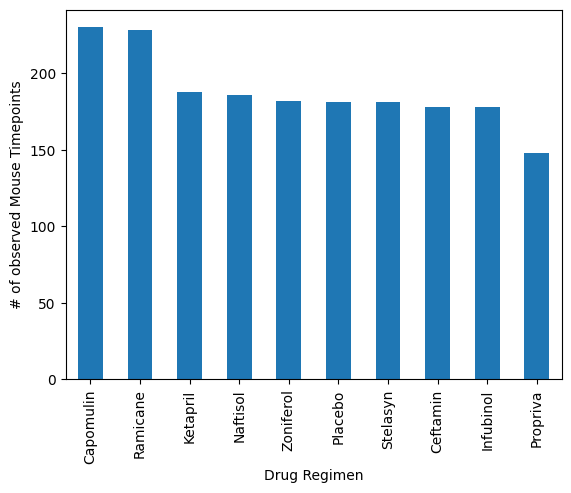

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plot_bar = count_mice_per_tret.plot.bar(align='center')
plt.show()

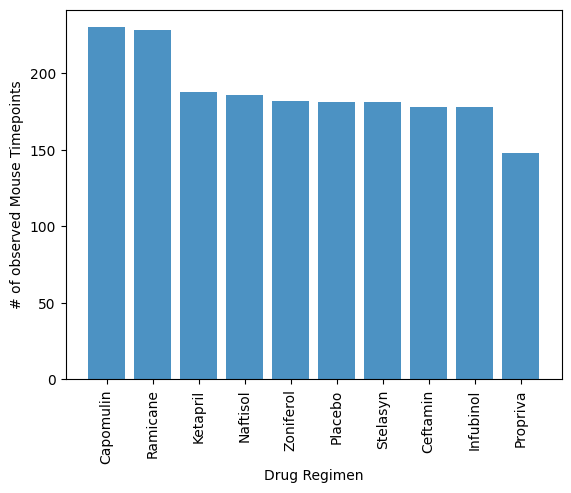

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis= count_mice_per_tret.index.values
y_axis = count_mice_per_tret.values
plt.bar(x_axis, y_axis, align="center", alpha= 0.8)
# creating lables for the graph
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=90)         #rotating x-labels


plt.show()

In [35]:
# using value_counts() to get a series containing counts of unique values.
gender_data = clean_study_data_complete["Sex"].value_counts()
gender_data

Sex
Male      958
Female    922
Name: count, dtype: int64

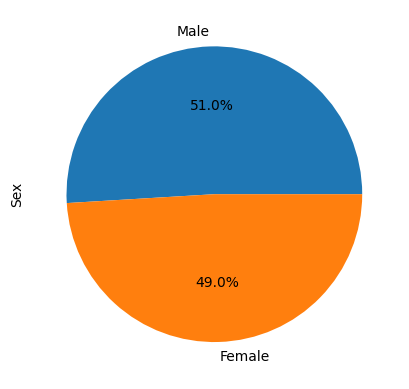

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_study_data_complete["Sex"].value_counts()

plot_pie= gender_data.plot.pie(ylabel='Sex',autopct= "%1.1f%%")
plt.show()

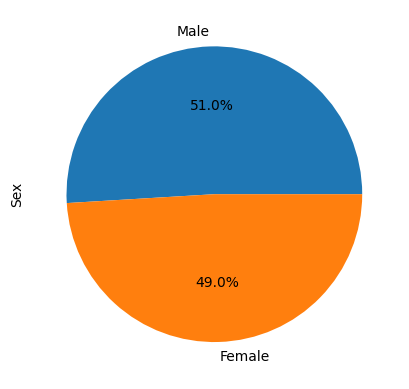

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data.index.values        # This line extracts the index values from the gender_data object and assigns them to the variable
sizes = gender_data.values               # This line extracts the values (count of each gender) and assigns them to the variable sizes.
plt.pie(sizes, labels=labels,autopct="%1.1f%%")

plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= clean_study_data_complete[('Timepoint')].groupby(clean_study_data_complete['Mouse ID']).max()

In [39]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume= pd.merge(last_timepoint, clean_study_data_complete,how="left",on=['Mouse ID','Timepoint'])
final_tumor_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [40]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol =final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


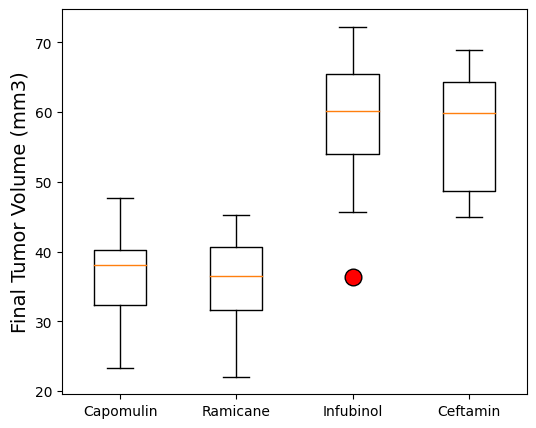

In [41]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(6,5))

ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments,flierprops={'markerfacecolor':'red', 'markersize':12})


plt.show()

## Line and Scatter Plots

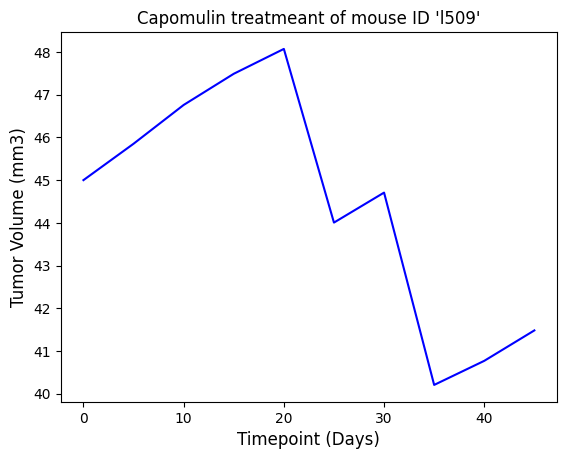

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#filter for the capomulin regimen.
capomulin_data = clean_study_data_complete[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulin_data

# Get data for a specific mouse ( Mouse ID = "l509")
mouse_capomulin = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
mouse_capomulin

# Specify plot parameters
x_axis = mouse_capomulin["Timepoint"]
tumor_volume = mouse_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of mouse ID 'l509'",fontsize =12)
plt.plot(x_axis, tumor_volume,linewidth=1.5,color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize =12)
plt.ylabel("Tumor Volume (mm3)",fontsize =12)
plt.show()

In [43]:
# Filter for the Capomulin regimen
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [44]:
# Calculate the average observed tumor volume for each mouse
average_tumor_volume= capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

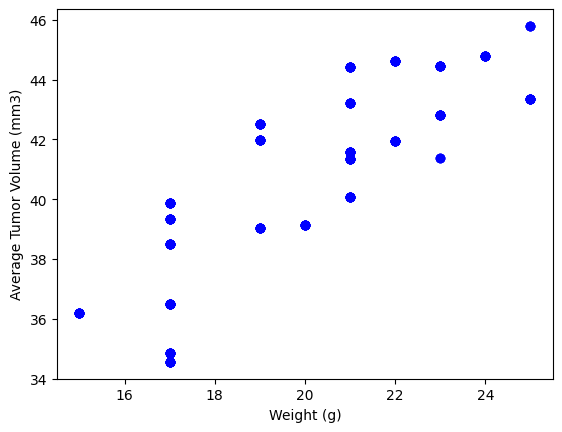

In [45]:
# Merge with the original DataFrame to get the weight information
# keep getting error when trying to add "weight" column in average.
# It seems that the error is caused by the absence of the column 'Weight (g)' in the DataFrame average_tumor_volume.
# so merged the weight column from capomulin_data on Mouse ID

average_tumor_volume = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'],marker='o',color='blue')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is : 0.83


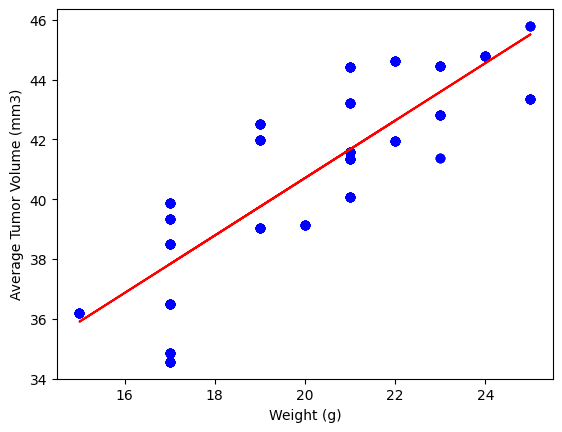

In [46]:
import scipy.stats as st
from scipy.stats import linregress
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])[0]

print (f"The correlation between mouse weight and average tumor volume is : {correlation_coefficient:.2f}")

## Calculate the linear regression model
x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

### generate the plot diagram


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'],marker='o',color='blue')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
# keep getting 0.83 instead of 0.84

In [48]:
print(f"Linear Regression Model: = {intercept:.2f} + {slope:.2f} * Weight (g)")

Linear Regression Model: = 21.49 + 0.96 * Weight (g)
